### Import packages

In [1]:
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Generate random data

In [2]:
np.random.seed(123)
df1 = np.random.randn(2,100)

In [3]:
df1.shape

(2, 100)

In [4]:
df2 = np.random.randn(2,100) + 2

### Plot data

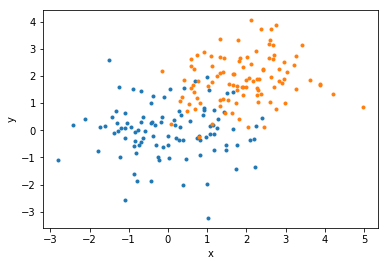

In [5]:
pl.plot(df1[0], df1[1], '.')
pl.plot(df2[0], df2[1], '.')
pl.xlabel('x')
pl.ylabel('y');

In [6]:
n = 2

In [7]:
random_stack = np.hstack([df1, df2])

In [8]:
center = np.array([[0.,-1.], [0,-2]]) 

In [9]:
def distance(x, y, center):
    distance = np.sqrt( (x - center[0])**2 + (y - center[1])**2)
    return distance

In [10]:
cl1 = distance(df1[0], df1[1], center[0]) < distance(df1[0], df1[1], center[1])
cl2 = distance(df2[0], df2[1], center[0]) < distance(df2[0], df2[1], center[1])

cl1



array([ True, False,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,  True], dtype=bool)

In [11]:
newc = np.array(
    [np.hstack([df1[:, cl1], df2[:, cl2]]).mean(axis=1), 
        np.hstack([df1[:, ~cl1], df2[:, ~cl2]]).mean(axis=1)])
print ("old center\n", center, "\nnew center\n", newc)



('old center\n', array([[ 0., -1.],
       [ 0., -2.]]), '\nnew center\n', array([[ 1.00498833,  1.03534991],
       [-0.10928169, -2.16218535]]))


In [12]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import display, clear_output
import time

# Here we check giving a random start to the points how the points get clustered

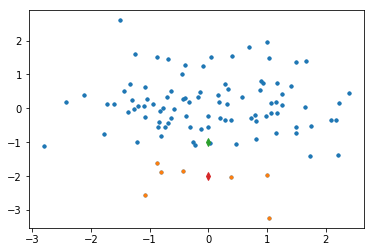

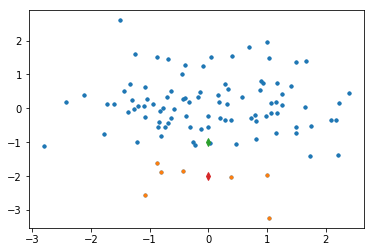

In [13]:


iterat = 0
fig, ax = plt.subplots()
l1, = ax.plot(np.hstack([df1[:, cl1], df1[:,cl2]])[0],\
            np.hstack([df1[:, cl1], df1[:,cl2]])[1], '.')

l2, = ax.plot(np.hstack([df1[:, ~cl1], df1[:,~cl2]])[0],\
            np.hstack([df1[:, ~cl1], df1[:,~cl2]])[1], '.')

l3, = ax.plot(center[0,0], center[0,1], 'd', ms=5)

l4, = ax.plot(center[1,0], center[1,1], 'd', ms=5)
display(fig)



# We iterate 10 time to find new clusters, in the bottom you can see how they end up being

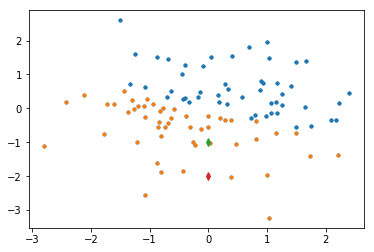

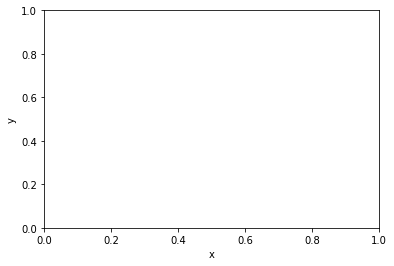

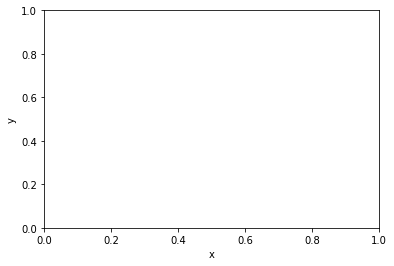

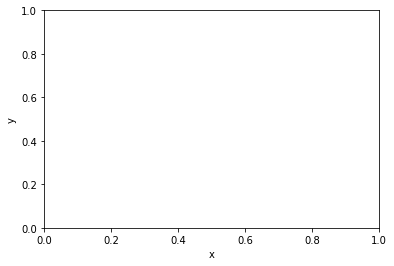

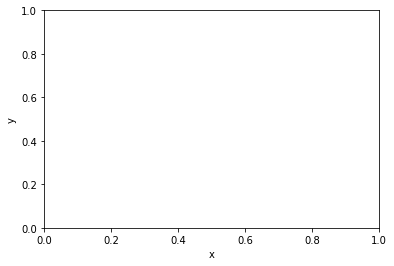

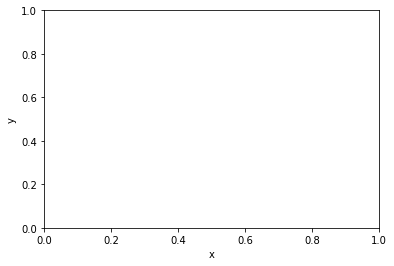

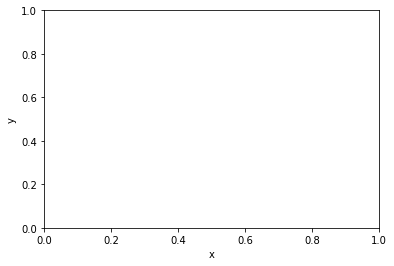

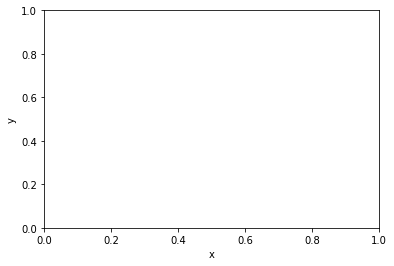

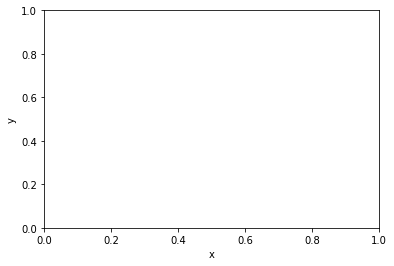

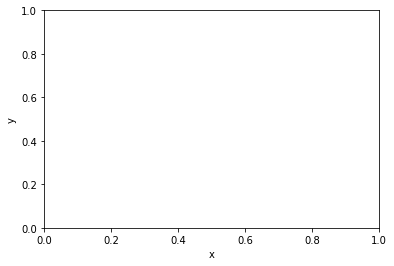

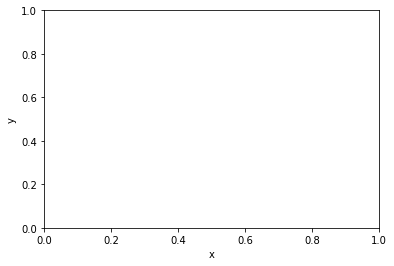

In [14]:
while iterat < 10 and center[0,0] != newc[0,0] and center[1,1] != newc[1,1] and center[1,0] != newc[1,0]\
and center[0,1] != newc[0,1]:
    print(iterat)
    iterat += 1
    centers = newc
    cl1 = distance(df1[0], df1[1], centers[0]) < distance(df1[0], df1[1], center[1])
    cl2 = distance(df2[0], df2[1], center[0]) < distance(df2[0], df2[1], center[1])
    newc = np.array(
    [np.hstack([df1[:, cl1], df2[:, cl2]]).mean(axis=1), 
        np.hstack([df1[:, ~cl1], df2[:, ~cl2]]).mean(axis=1)])
    print ("old center\n", centers, "\nnew center\n", newc)
    pl.figure()
    l1.set_data(np.hstack([df1[:, cl1], df1[:,cl2]])[0],\
            np.hstack([df1[:, cl1], df1[:,cl2]])[1])
    l2.set_data(np.hstack([df1[:, ~cl1], df1[:,~cl2]])[0],\
            np.hstack([df1[:, ~cl1], df1[:,~cl2]])[1])
    l3.set_data(center[0,0], center[0,1])
    l4.set_data(center[1,0], center[1,1])
    pl.xlabel('x')
    pl.ylabel('y')
    time.sleep(1)
    clear_output(wait=True)
    display(fig)
plt.show();

# Could not do the animation :(